In [1]:
from src.DeepRock.models import AdvSeg
from src.DeepRock.data import DataGenerator
from src.DeepRock.utils import split_trn_vld_tst, test_fn
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
test_path = './data/test/'
sag_dtype = 'sent_ast_geo'
sa_dtype = 'sent_ast'
s_dtype = 'sent'

#### start to build Conv2D for different input data

In [3]:
s_conv = AdvSeg(dtype=s_dtype)
# sa_conv = AdvSeg(dtype=sa_dtype)
# sag_conv = AdvSeg(dtype=sag_dtype)
s_conv.build_SegmentationNet()
# sa_conv.build_SegmentationNet()
# sag_conv.build_SegmentationNet()

building Segmentation U-net ...
[64, 64, 64, 64]
[64, 64, 64]
compiling Segmentation only, lr is 0.001 ...


#### load weights

In [4]:
# sag_conv.load_weights('./Segmentation/sent_ast_geo/weights-115-0.77.hdf5')
# sa_conv.load_weights('./Segmentation/sent_ast/weights-107-0.71.hdf5')
s_conv.load_weights('./Segmentation/sent/weights-55-0.59.hdf5')

#### prepare test data

In [6]:
_, _, _, _, X_tst, Y_tst = split_trn_vld_tst('./data/train/', vld_rate=0.2, tst_rate=0.1, seed=10)
s_tst_data = DataGenerator(X_tst, Y_tst, batch_size=len(X_tst), shuffle=False, dtype=s_dtype)
# sa_tst_data = DataGenerator(X_tst, Y_tst, batch_size=len(X_tst), shuffle=False, dtype=sa_dtype)
# sag_tst_data = DataGenerator(X_tst, Y_tst, batch_size=len(X_tst), shuffle=False, dtype=sag_dtype)

split into 208 train, 59 validation, 29 test samples


#### test

loading test data ...
predicting with sent...
29/29 [==============================] - 21s 720ms/step
mean accuracy on test data is 0.47169442012392243, std is 0.29066189431905054
max is 0.96209716796875, min is 0.0306549072265625
0


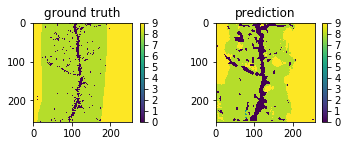

1


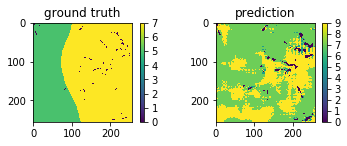

2


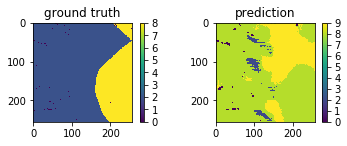

3


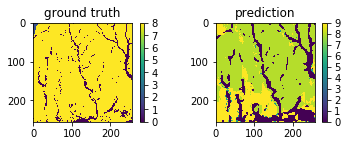

4


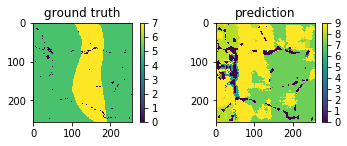

5


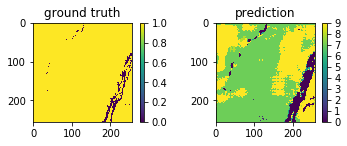

6


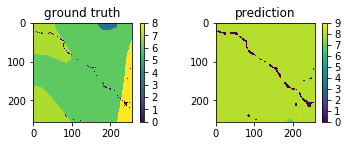

7


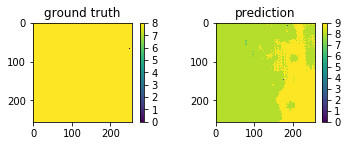

8


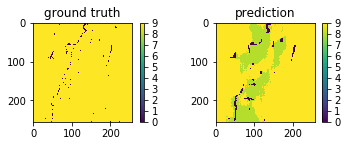

9


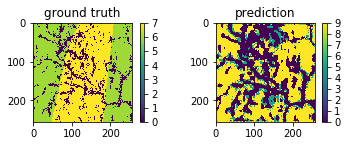

10


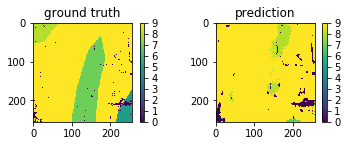

11


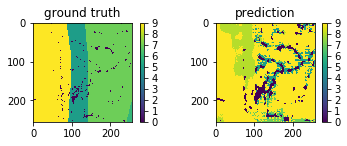

12


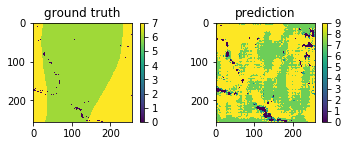

13


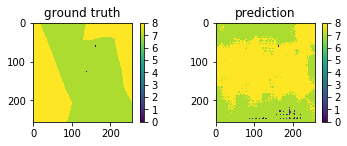

14


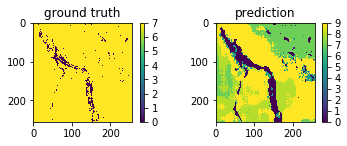

15


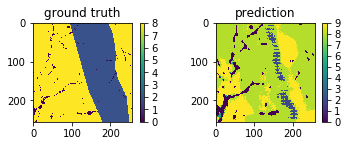

16


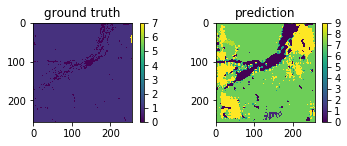

17


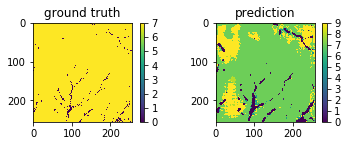

18


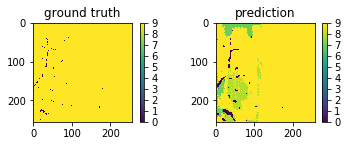

19


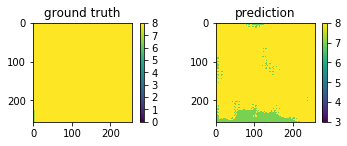

20


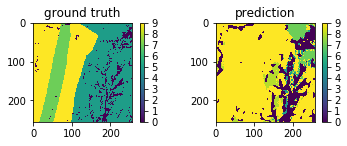

21


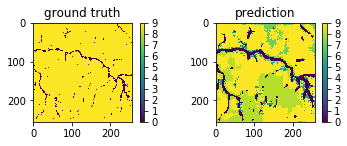

22


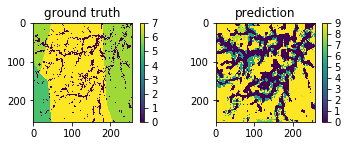

23


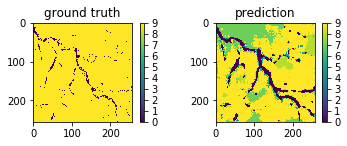

24


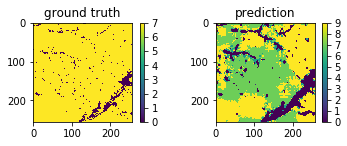

25


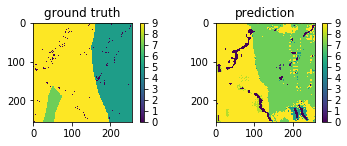

26


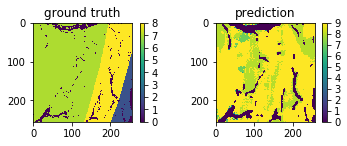

27


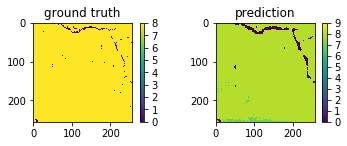

28


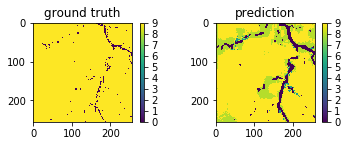

In [7]:
s_cls = test_fn(s_conv, s_tst_data, verbose=1)

In [8]:
s_cls

array([ 0.94363877,  0.93374213,  0.9620656 ,  0.99960169,  1.        ,
        0.9105735 ,  0.92606906,  0.72930224,  0.82884479,  0.70955105])

#### calculate the accuracy

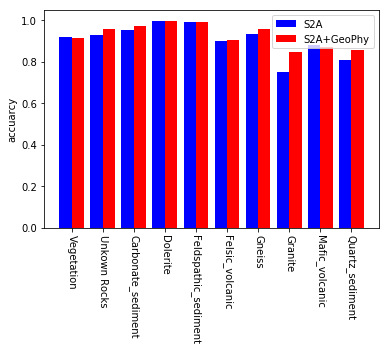

In [126]:
cls_names = ['Vegetation', 'Unkown Rocks', 'Carbonate_sediment',
           'Dolerite', 'Feldspathic_sediment', 'Felsic_volcanic', 'Gneiss', 'Granite', 'Mafic_volcanic', 'Quartz_sediment']
ax = plt.subplot(111)
ax.bar(np.arange(10)-0.2, acc_cls, width=0.4, color='b', align='center', label='S2A')
ax.bar(np.arange(10)+0.2, acc_cls_sg, width=0.4, color='r', align='center', label='S2A+GeoPhy')
plt.xticks(np.arange(10), cls_names, rotation=270)
plt.ylabel('accuarcy')
plt.legend()